In [9]:
from tensorflow.keras.datasets import imdb

In [10]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
print(x_train.shape)
print(x_test.shape )

(25000,)
(25000,)


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
x_train = pad_sequences(x_train, maxlen = 200);
x_test = pad_sequences(x_test, maxlen = 200)

In [21]:
import numpy as np


In [33]:
x_train = np.asarray(x_train).astype("float32")

x_test = np.asarray(x_test).astype("float32")


In [34]:
import keras

In [48]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

In [49]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 1.5472 - val_accuracy: 0.5112 - val_loss: 1.7450
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5110 - loss: 1.4352 - val_accuracy: 0.4914 - val_loss: 1.6592
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 1.3323 - val_accuracy: 0.5000 - val_loss: 1.4431
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 1.2971 - val_accuracy: 0.4964 - val_loss: 1.4729
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5143 - loss: 1.0680 - val_accuracy: 0.5026 - val_loss: 1.4007
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5107 - loss: 1.1226 - val_accuracy: 0.4890 - val_loss: 1.4193
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5175 - loss: 1.0316 - val_accuracy: 0.5116 - val_loss: 1.2492
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 1.0495 - val_accuracy: 0.4958 - v

In [62]:
dict_data = history.history

In [63]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [64]:
import matplotlib.pyplot as plt

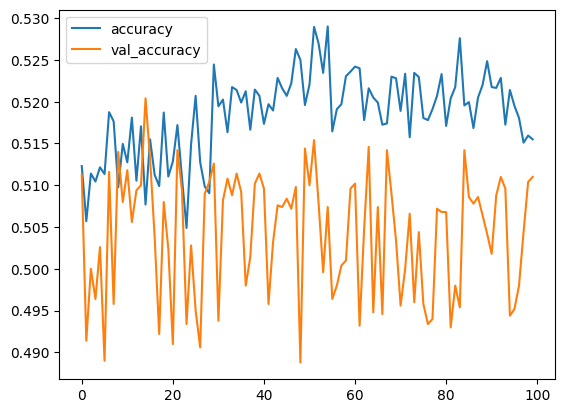

In [65]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']


plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.legend()
plt.show()

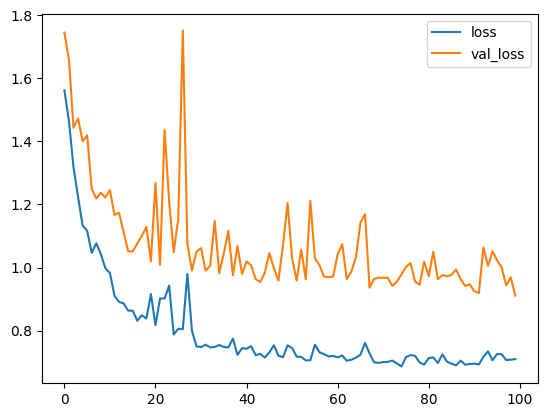

In [66]:
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer

def predict_review(review, model, tokenizer, max_len=200):
    """
    Predict the sentiment of a review.

    Args:
        review (str): The input review as a string.
        model (keras.Model): The trained model.
        tokenizer (Tokenizer): The tokenizer for the IMDB dataset.
        max_len (int): Maximum length for padding sequences.

    Returns:
        str: "Positive" or "Negative" based on the prediction.
    """
    # Tokenize and convert the review to sequences
    review_seq = tokenizer.texts_to_sequences([review])
    # Pad the sequence
    review_seq_padded = pad_sequences(review_seq, maxlen=max_len)
    # Predict the sentiment
    prediction = model.predict(review_seq_padded)
    # Return the result
    return "Positive" if prediction[0] > 0.5 else "Negative"

# Example usage:
# Create the IMDB tokenizer (this is based on the IMDB dataset used earlier)
imdb_tokenizer = Tokenizer(num_words=10000)
imdb_tokenizer.fit_on_texts([''])  # Initialize tokenizer for IMDB dataset

# Replace this with the actual review you want to predict
example_review = "This movie was fantastic! The acting was superb and the story was gripping."

# Predict the sentiment
result = predict_review(example_review, model, imdb_tokenizer)
print(f"The review sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The review sentiment is: Negative
